In [14]:
import numpy as np
import scipy as sp
import functools
from bisect import bisect_left
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
random.seed(42)

In [12]:
class GK01():
    @functools.total_ordering
    class T():
        def __init__(self, v, g, delta):
            self.v = v
            self.g = g
            self.delta = delta
            
        def __lt__(self, other):
            return self.v < other.v
    
    def __init__(self, epsilon: float):
        self.S = []
        self.n = 0
        self.epsilon = epsilon
        self.interval = int(np.floor(1 / (2 * epsilon)))
    
    def add(self, v: int):
        t = self.T(v=v, g=1, delta=int(np.floor(2 * self.epsilon * self.n)))
        index = self.get_insert_index(t)
        if index == 0 or index == len(self.S):
            t.delta = 0;
    
        if self.n % self.interval == 0:
            self.compress()
    
        self.S.insert(index, t)
        self.n += 1
    
            
    def get_insert_index(self, t: T):
        index = bisect_left(self.S, t)
        return index
    
    def compress(self):
        for i in range(len(self.S) - 2, 0, -1):
            while i < len(self.S) - 1 and self.delete_el(i):
                continue

    def delete_el(self, i: int):
        t1, t2 = self.S[i], self.S[i + 1]
        
        if t1.delta >= t2.delta and t1.g + t2.g + t2.delta < int(np.floor(2 * self.epsilon * self.n)):
            self.S.pop(i)
            t2.g += t1.g
            return True
        
        return False
        
    def get_quantile(self, p: float):
        rank = p * (self.n - 1) + 1
        margin = int(np.ceil(self.epsilon * self.n))
        
        best = -1
        best_dist = np.inf
        r_min = 0
        for i, t_i in enumerate(self.S):
            r_min += t_i.g
            r_max = r_min + t_i.delta
            if rank - margin <= r_min and r_max <= rank + margin:
                cur_dist = np.abs(rank - (r_min + r_max) / 2)
                if cur_dist < best_dist:
                    best_dist = cur_dist
                    best = i
        if best == -1:
            return('error')
        return self.S[best].v


In [16]:
data = []
stream = list(range(100000))

for k in tqdm(range(200)):
    data.append(0)
    gk01 = GK01(0.0001)
    random.shuffle(stream)
    for el in stream:
        gk01.add(el)
        if data[k] < len(gk01.S):
            data[k] = len(gk01.S)

100%|██████████| 200/200 [04:13<00:00,  1.27s/it]


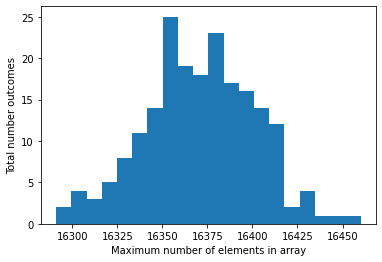

In [22]:
plt.hist(data, bins=20)
plt.ylabel('Total number outcomes')
plt.xlabel('Maximum number of elements in array')
None

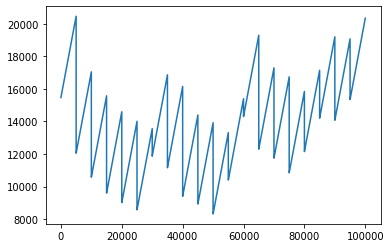

In [192]:
plt.plot([m[0] for m in data], [m[1] for m in data])

In [187]:
data[100:200]

[(101, 101),
 (102, 102),
 (103, 103),
 (104, 104),
 (105, 105),
 (106, 106),
 (107, 107),
 (108, 108),
 (109, 109),
 (110, 110),
 (111, 111),
 (112, 112),
 (113, 113),
 (114, 114),
 (115, 115),
 (116, 116),
 (117, 117),
 (118, 118),
 (119, 119),
 (120, 120),
 (121, 121),
 (122, 122),
 (123, 123),
 (124, 124),
 (125, 125),
 (126, 126),
 (127, 127),
 (128, 128),
 (129, 129),
 (130, 130),
 (131, 131),
 (132, 132),
 (133, 133),
 (134, 134),
 (135, 135),
 (136, 136),
 (137, 137),
 (138, 138),
 (139, 139),
 (140, 140),
 (141, 141),
 (142, 142),
 (143, 143),
 (144, 144),
 (145, 145),
 (146, 146),
 (147, 147),
 (148, 148),
 (149, 149),
 (150, 150),
 (151, 151),
 (152, 152),
 (153, 153),
 (154, 154),
 (155, 155),
 (156, 156),
 (157, 157),
 (158, 158),
 (159, 159),
 (160, 160),
 (161, 161),
 (162, 162),
 (163, 163),
 (164, 164),
 (165, 165),
 (166, 166),
 (167, 167),
 (168, 168),
 (169, 169),
 (170, 170),
 (171, 171),
 (172, 172),
 (173, 173),
 (174, 174),
 (175, 175),
 (176, 176),
 (177, 177),